<a href="https://colab.research.google.com/github/rnjt13/transfer_learning/blob/main/Transfer_learning_VGG16_cat_vs_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!ls

dogs_vs_cats  dogs-vs-cats.zip	kaggle.json  sample_data  test	train


In [3]:
# 1. !ls - list all files in the current directory
# 2. !mkdir kaggle_1  -> makes a directory named as kaggle_1 inside content folder
# 3. !mkdir -p ~/.kaggle_3  -> makes a directory named as kaggle_3 inside root folder
# 4. Create your API token(Create New Token) from kaggle.com/settings and download the json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
# downloading dataset from https://www.kaggle.com/datasets/salader/dogs-vs-cats
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:04<00:00, 231MB/s]
100% 1.06G/1.06G [00:04<00:00, 236MB/s]


In [5]:
#unzipping data
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16

In [7]:
# creating an object of VGG16 model to used as CNN layer
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [8]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [9]:
# Creating ANN layers
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Keeping CNN paramaters constant, only train ANN parameters
conv_base.trainable = False

In [12]:
# Using Generators to add data in batches
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,epochs=5,validation_data=test_ds)

Epoch 1/5
625/625 [==============================] - 62s 89ms/step - loss: 0.2656 - accuracy: 0.8876 - val_loss: 0.2086 - val_accuracy: 0.9098
Epoch 2/5
625/625 [==============================] - 55s 88ms/step - loss: 0.1889 - accuracy: 0.9226 - val_loss: 0.2409 - val_accuracy: 0.8964
Epoch 3/5
625/625 [==============================] - 55s 87ms/step - loss: 0.1583 - accuracy: 0.9349 - val_loss: 0.2055 - val_accuracy: 0.9162
Epoch 4/5
625/625 [==============================] - 55s 87ms/step - loss: 0.1371 - accuracy: 0.9449 - val_loss: 0.2410 - val_accuracy: 0.9096
Epoch 5/5
625/625 [==============================] - 63s 101ms/step - loss: 0.1104 - accuracy: 0.9559 - val_loss: 0.2460 - val_accuracy: 0.9126


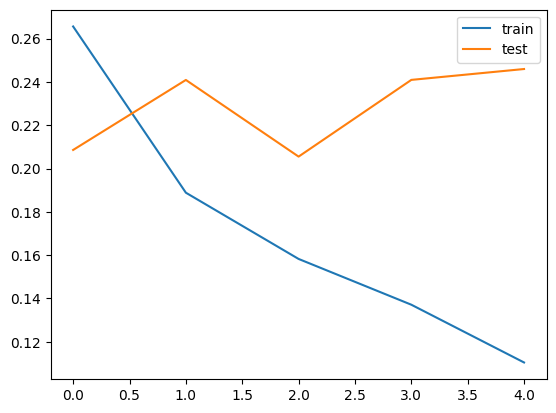

In [16]:
# Plotting train and test loss v/s epochs
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

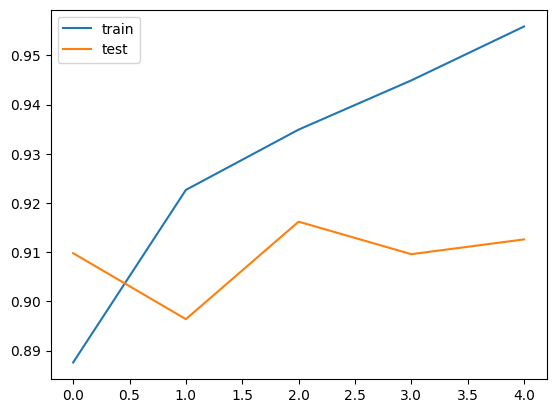

In [17]:
# Plotting train and test accuracy v/s epochs
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()

In [18]:
import pickle
pickle.dump(model,open('Transfer_learning_VGG16_cat_vs_dog_classifier_pickle_file.pkl','wb'))